## Import Standard Libraries for Data Analysis

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read Dataset check the size and other basic details

In [24]:
df = pd.read_csv('loan.csv')

In [25]:
df.shape

(39717, 111)

In [26]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [27]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Check which all columns have NULL values

In [29]:
df.isna().mean()


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

## Remove all the Columns which are completely NULL Because these do not help us in any analysis

In [30]:
a = df.isna().mean()
columns_which_are_all_null = a[a==1]
#len(columns_which_are_all_null)  54 columns are totally NA 
df = df.drop(columns=columns_which_are_all_null.index,axis=1)

In [31]:
111-len(df.columns)

54

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Get Numeric columns , Categorical Columns from the existing Dtypes

In [32]:
#df.info()

numerics = ['float64', 'int64']
num_df = df.select_dtypes(include=numerics)
num_df.head()
cat_df = df.select_dtypes(exclude=numerics)
cat_df.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,NaN,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,NaN,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,personel,917xx,CA,Feb-96,21%,f,Jan-15,NaN,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,...,Personal,972xx,OR,Jan-96,53.90%,f,May-16,Jun-16,May-16,INDIVIDUAL


In [33]:
num_cols = num_df.columns
cat_cols = cat_df.columns
print(num_cols)
print(cat_cols)
print(f'Total Columns  -- {len(df.columns)}')
print(f'Categorical columns -- {len(cat_cols)}')
print(f'Numeric Columns   --- {len(num_cols)}')

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_

## Checking to see if we can further find any more data cleanup 

In [34]:
df.isna().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325855
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [35]:
df.loan_status.value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

## Check columns which have more than 50% na values and try fixing these records

In [36]:
a = df.isna().mean()
a[a>0.5]

mths_since_last_delinq    0.646625
mths_since_last_record    0.929854
next_pymnt_d              0.971297
dtype: float64

In [37]:
df.next_pymnt_d.value_counts()

next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64

In [38]:
df.drop(columns=['next_pymnt_d'],inplace=True)

### I think next_paymnt_d will not likely determine if a person is likely to default considering it has 97% null values we will drop this column 
### Similarly mths_since_last_record has huge null values probably wont aid in the descision process. 

In [39]:
df.drop(columns=['mths_since_last_record'],inplace=True)

In [40]:
a[a>0.09]

desc                      0.325855
mths_since_last_delinq    0.646625
mths_since_last_record    0.929854
next_pymnt_d              0.971297
dtype: float64

In [41]:
df.desc.value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

In [42]:
df.drop(columns=['desc'],inplace=True)

In [ ]:
df.drop(columns=['mths_since_last_delinq'],inplace=True)

## Check if Further cleanup required

In [27]:
a = df.isna().mean()
a[a != 0]   

emp_title                     0.061913
emp_length                    0.027066
title                         0.000277
revol_util                    0.001259
last_pymnt_d                  0.001788
last_credit_pull_d            0.000050
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
pub_rec_bankruptcies          0.017549
tax_liens                     0.000982
dtype: float64

In [45]:
df.pub_rec_bankruptcies.isna().sum()

697

In [46]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [47]:
df.pub_rec_bankruptcies.fillna(0,inplace=True)

As everything is 0 in tax_liens drop the column itself its not useful for any sort of analysis

In [48]:
df.drop(columns=['tax_liens'],inplace=True)

In [49]:
a = df.isna().mean()
a[a != 0]  

emp_title                     0.061913
emp_length                    0.027066
title                         0.000277
revol_util                    0.001259
last_pymnt_d                  0.001788
last_credit_pull_d            0.000050
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
dtype: float64

In [50]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [51]:
df.drop(columns=['chargeoff_within_12_mths'],inplace=True)

In [52]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [53]:
df.drop(columns=['collections_12_mths_ex_med'],inplace=True)

In [54]:
df.last_credit_pull_d.isna().sum()

2

In [38]:
df.last_credit_pull_d.describe()

count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object

Not sure from above and value counts what is a good replacement for last_credit_pull_d

In [55]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [56]:
df.emp_length.isna().sum()

1075

In [57]:
df.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [58]:
df.emp_title.isna().sum()

2459

In [59]:
df.title.value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

Not sure if employer name could help in any default Analysis , not sure what to fill null values here   

As per column metadata description lets fix the emp_length

In [61]:
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x == '< 1 year' else x)

# b = df['emp_length'].str.extract('(\d+)')
# b.value_counts()
# df['emp_length'] = b

In [62]:
df.emp_length.value_counts()

emp_length
10+ years    8879
0            4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [63]:
df.emp_length.isna().sum()


1075

In [64]:
df.emp_length.fillna(0,inplace=True)

In [65]:
df.emp_length.value_counts()

emp_length
10+ years    8879
0            5658
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [66]:
df['emp_length'] = df['emp_length'].replace(0,'0 years')

In [67]:
df.emp_length.value_counts()

emp_length
10+ years    8879
0 years      5658
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [68]:
df.emp_length = df.emp_length.str.extract('(\d+)')

In [69]:
df.emp_length.value_counts()

emp_length
10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [70]:
a = df.isna().mean()
a[a != 0]   

emp_title             0.061913
title                 0.000277
revol_util            0.001259
last_pymnt_d          0.001788
last_credit_pull_d    0.000050
dtype: float64

In [71]:
df.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [72]:
df.revol_util = df.revol_util.str.strip('%')

In [73]:
df.revol_util.value_counts()

revol_util
0        977
0.20      63
63        62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [74]:
df.revol_util.isna().sum()

50

In [75]:
df.revol_util.fillna(0,inplace=True)

In [76]:
a = df.isna().mean()
a[a != 0]  

emp_title             0.061913
title                 0.000277
last_pymnt_d          0.001788
last_credit_pull_d    0.000050
dtype: float64

In [60]:
df.title.value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [78]:
df.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [79]:
df.last_pymnt_d.value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [63]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.0,0.0,0.042501
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.202603
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.0,0.0,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.0,0.0,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               39717 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [81]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


URL has no impact on person defaulting a loan

In [82]:
df.drop(columns=['url'],inplace=True)

In [83]:
df.drop(columns=['emp_title'],inplace=True)

In [84]:
df.zip_code.value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

In [69]:
df.zip_code.isna().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [85]:
df.int_rate = df.int_rate.str.strip('%')

In [86]:
df.int_rate.isna().sum()

0

In [87]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [74]:
df.isna().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
purpose                     0
title                      11
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
out_prncp                   0
out_prncp_inv               0
total_pymn

In [88]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

There is no way to determine if customers who are on EMI will default or not default , these wont be useful for determining if custome will default or not default

In [89]:
df = df[df.loan_status != 'Current']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  object 
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d                  38

In [90]:
df.int_rate = df.int_rate.astype(float)
df.emp_length = df.emp_length.astype(int)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  int64  
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d                  38

In [80]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0


In [92]:
df.loan_status.value_counts(normalize=True)

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

In [82]:
df.purpose.value_counts(normalize=True)

purpose
debt_consolidation    0.468025
credit_card           0.130311
other                 0.100189
home_improvement      0.074526
major_purchase        0.055733
small_business        0.045468
car                   0.038857
wedding               0.024004
medical               0.017653
moving                0.014931
vacation              0.009721
house                 0.009513
educational           0.008425
renewable_energy      0.002644
Name: proportion, dtype: float64

# Remove Outliers in the data

In [93]:
numerics = ['float64', 'int64']
num_df = df.select_dtypes(include=numerics)
cat_df = df.select_dtypes(exclude=numerics)
cat_df.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,RENT,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,Jan-85,83.70,f,Jan-15,May-16,INDIVIDUAL
1,60 months,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,Apr-99,9.40,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,Nov-01,98.50,f,Jun-14,May-16,INDIVIDUAL
3,36 months,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,Feb-96,21,f,Jan-15,Apr-16,INDIVIDUAL
5,36 months,A,A4,RENT,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30,f,Jan-15,Jan-16,INDIVIDUAL


In [94]:
num_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,10,24000.0,27.65,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,0,30000.0,1.00,...,456.46,435.17,0.00,117.08,1.11,119.66,1,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,10,12252.0,8.72,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,10,49200.0,20.00,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,7.90,156.46,3,36000.0,11.20,...,5000.00,632.21,0.00,0.00,0.00,161.03,1,0,0,0.0


In [96]:
num_df.columns
print(f'Number of Numeric columns --- {len(num_df.columns)}')


Number of Numeric columns --- 30


<Axes: >

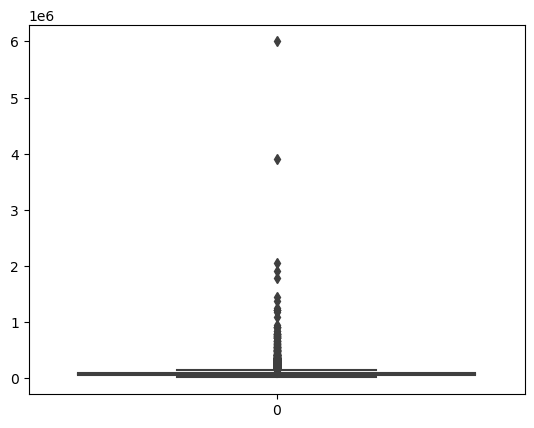

In [97]:
sns.boxplot(df.annual_inc)

In [98]:
df = df[df.annual_inc < df.annual_inc.quantile(0.95)]

<Axes: >

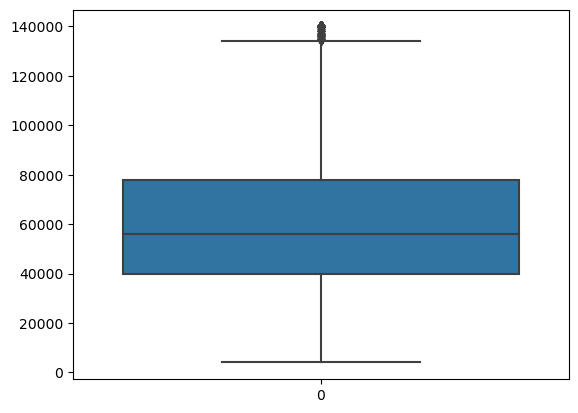

In [99]:
sns.boxplot(df.annual_inc)

In [89]:
df.annual_inc.quantile([.5,.75,.9,.95,.99])

0.50     56000.00
0.75     77704.05
0.90    100000.00
0.95    117000.00
0.99    135000.00
Name: annual_inc, dtype: float64

<Axes: >

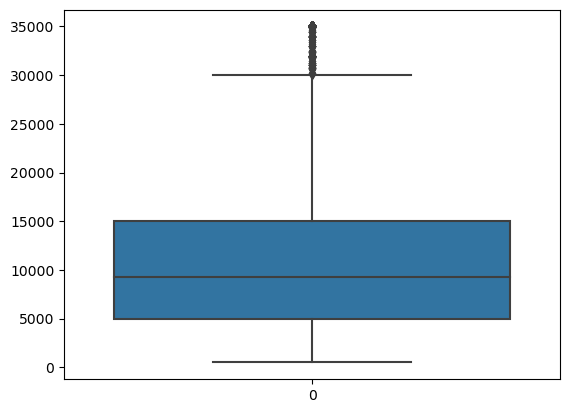

In [90]:
sns.boxplot(df.loan_amnt)

<Axes: >

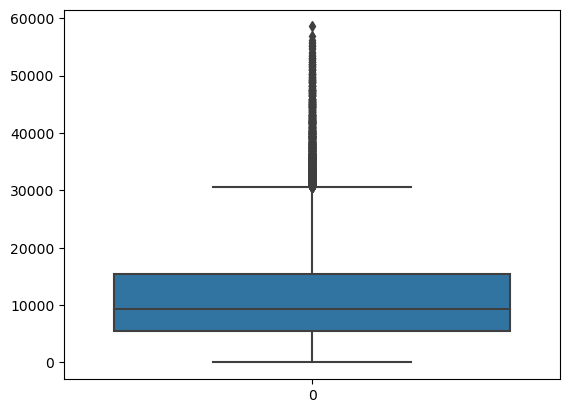

In [91]:
sns.boxplot(df.total_pymnt)

<Axes: >

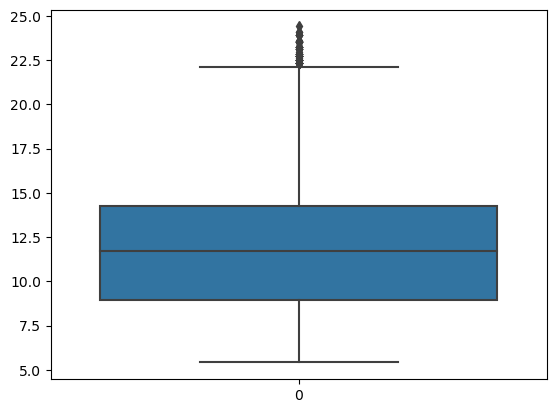

In [92]:
sns.boxplot(df.int_rate)

In [100]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.664200e+04,3.664200e+04,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,...,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.0,36642.0,36642.0,36642.000000
mean,6.761117e+05,8.419924e+05,10681.045658,10435.008324,9892.999247,11.887884,311.863566,4.764942,60829.831120,13.447256,...,9309.549310,2034.173373,1.333709,95.129353,12.184408,2626.937666,1.0,0.0,0.0,0.043911
std,2.092756e+05,2.644473e+05,7047.619569,6799.747627,6730.054355,3.667161,199.215000,3.588478,27717.831464,6.661561,...,6699.681136,2272.307712,7.131044,680.377281,145.637547,4303.309850,0.0,0.0,0.0,0.205566
min,5.473400e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,5.121720e+05,6.613342e+05,5000.000000,5000.000000,4975.000000,8.940000,163.080000,2.000000,40000.000000,8.350000,...,4326.642500,630.137500,0.000000,0.000000,0.000000,212.352500,1.0,0.0,0.0,0.000000
50%,6.556645e+05,8.379300e+05,9250.000000,9000.000000,8375.000000,11.710000,270.410000,4.000000,56000.000000,13.580000,...,8000.000000,1262.115000,0.000000,0.000000,0.000000,543.675000,1.0,0.0,0.0,0.000000
75%,8.281370e+05,1.036338e+06,15000.000000,14400.000000,13618.409453,14.270000,408.480000,8.000000,77704.050000,18.717500,...,12500.000000,2555.610000,0.000000,0.000000,0.000000,3300.385000,1.0,0.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,140000.000000,29.990000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


In [101]:
num_df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.053936,0.076088,0.093140,0.005572,0.091785,...,0.092979,0.123268,-0.055789,0.038686,-0.010916,0.142251,NaN,NaN,NaN,0.001093
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.050808,0.070918,0.097024,0.006442,0.092910,...,0.093773,0.126660,-0.058497,0.036526,-0.012831,0.142582,NaN,NaN,NaN,0.002390
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.301265,0.932260,0.156493,0.268999,0.062436,...,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,NaN,NaN,NaN,-0.035141
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.304930,0.958035,0.156229,0.264798,0.062194,...,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,NaN,NaN,NaN,-0.036189
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.297473,0.905464,0.165112,0.251981,0.070663,...,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,NaN,NaN,NaN,-0.036327
int_rate,0.053936,0.050808,0.301265,0.304930,0.297473,1.000000,0.277203,0.011633,0.048899,0.110913,...,0.174717,0.521233,0.094319,0.128596,0.070013,0.174377,NaN,NaN,NaN,0.084016
installment,0.076088,0.070918,0.932260,0.958035,0.905464,0.277203,1.000000,0.131492,0.267842,0.052038,...,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,NaN,NaN,NaN,-0.033038
emp_length,0.093140,0.097024,0.156493,0.156229,0.165112,0.011633,0.131492,1.000000,0.120469,0.050561,...,0.132857,0.122103,-0.014756,0.025498,0.006244,0.088121,NaN,NaN,NaN,0.048594
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,0.048899,0.267842,0.120469,1.000000,-0.121530,...,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,NaN,NaN,NaN,-0.015955
dti,0.091785,0.092910,0.062436,0.062194,0.070663,0.110913,0.052038,0.050561,-0.121530,1.000000,...,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,NaN,NaN,NaN,0.007315


In [102]:
df.out_prncp.value_counts()

out_prncp
0.0    36642
Name: count, dtype: int64

In [103]:
df.out_prncp_inv.value_counts()

out_prncp_inv
0.0    36642
Name: count, dtype: int64

In [104]:
df.policy_code.value_counts()

policy_code
1    36642
Name: count, dtype: int64

In [105]:
df.acc_now_delinq.value_counts()

acc_now_delinq
0    36642
Name: count, dtype: int64

In [106]:
df.delinq_amnt.value_counts()

delinq_amnt
0    36642
Name: count, dtype: int64

## None of the above columns are useful for any corelation so drop these columns 

In [107]:
df.drop(columns=['out_prncp','out_prncp_inv','policy_code','acc_now_delinq','delinq_amnt'],inplace=True)

In [108]:
numerics = ['float64', 'int64']
num_df = df.select_dtypes(include=numerics)
cat_df = df.select_dtypes(exclude=numerics)

In [109]:
num_df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993624,0.115436,0.126312,0.227905,0.050195,0.071186,0.094892,0.033070,0.093402,...,0.037029,0.103211,0.188982,0.085746,0.117001,-0.061840,0.040874,-0.009078,0.141309,0.002532
member_id,0.993624,1.000000,0.115510,0.125597,0.238092,0.046996,0.066151,0.098919,0.034710,0.094312,...,0.039431,0.104829,0.199803,0.086793,0.120554,-0.064481,0.038721,-0.011026,0.141751,0.003891
loan_amnt,0.115436,0.115510,1.000000,0.981940,0.936901,0.291145,0.931488,0.157613,0.403358,0.090237,...,0.239093,0.876601,0.841517,0.838632,0.727049,0.041909,0.145113,0.075400,0.469349,-0.028946
funded_amnt,0.126312,0.125597,0.981940,1.000000,0.954829,0.296134,0.957120,0.157282,0.399203,0.089438,...,0.233902,0.893239,0.858119,0.856444,0.735475,0.044297,0.147145,0.077610,0.474143,-0.029997
funded_amnt_inv,0.227905,0.238092,0.936901,0.954829,1.000000,0.288743,0.902616,0.166206,0.382540,0.097037,...,0.226421,0.868781,0.904222,0.830841,0.724377,0.023869,0.134316,0.062865,0.466431,-0.030540
int_rate,0.050195,0.046996,0.291145,0.296134,0.288743,1.000000,0.269155,0.009038,0.053952,0.111587,...,-0.064123,0.279973,0.274327,0.163261,0.516251,0.090042,0.126761,0.068004,0.165263,0.088120
installment,0.071186,0.066151,0.931488,0.957120,0.902616,0.269155,1.000000,0.131165,0.398460,0.079374,...,0.212512,0.853480,0.811120,0.841004,0.640784,0.052380,0.124057,0.075633,0.407925,-0.026909
emp_length,0.094892,0.098919,0.157613,0.157282,0.166206,0.009038,0.131165,1.000000,0.212148,0.058753,...,0.204760,0.140998,0.149730,0.132296,0.124497,-0.016529,0.023901,0.002430,0.088006,0.052544
annual_inc,0.033070,0.034710,0.403358,0.399203,0.382540,0.053952,0.398460,0.212148,1.000000,-0.072526,...,0.386327,0.382223,0.368131,0.382960,0.272730,0.002496,0.041053,0.021001,0.219926,-0.005109
dti,0.093402,0.094312,0.090237,0.089438,0.097037,0.111587,0.079374,0.058753,-0.072526,1.000000,...,0.245962,0.086089,0.092098,0.064112,0.121338,-0.010948,0.027329,0.011386,0.025007,0.005256


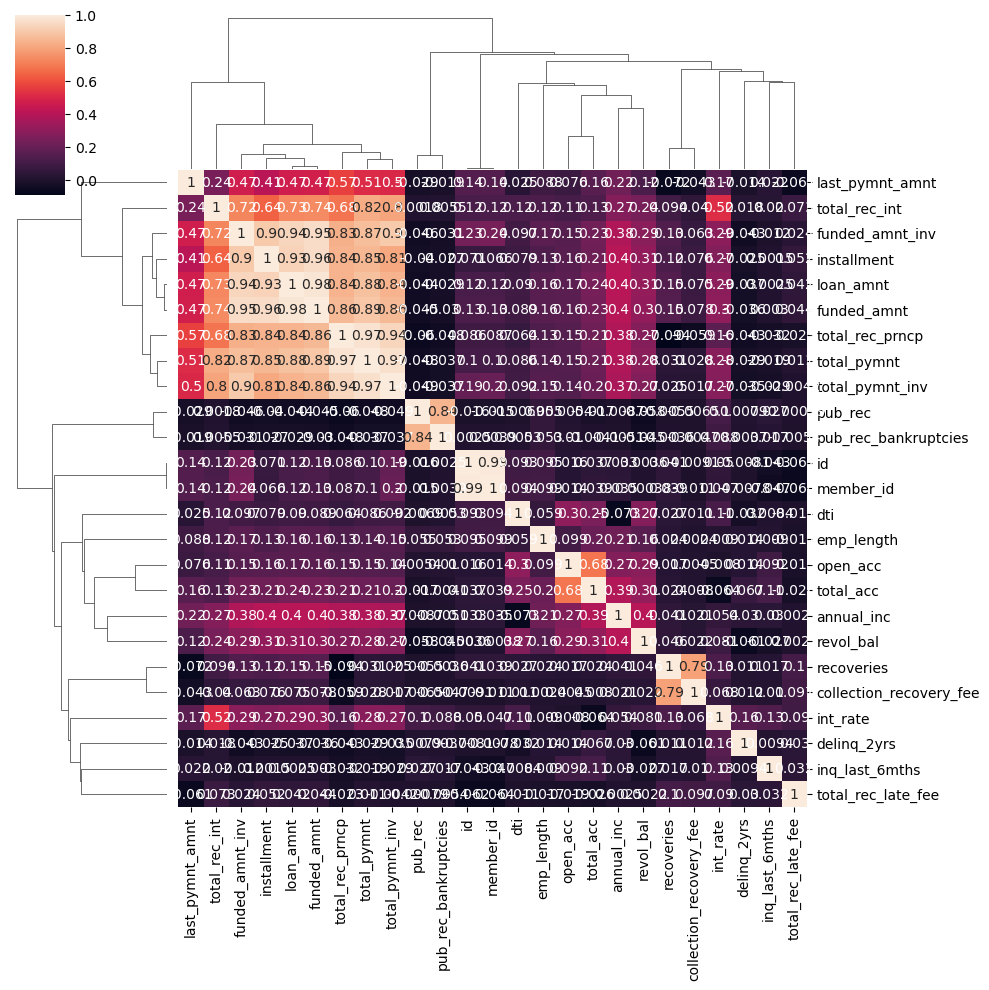

In [110]:
sns.clustermap(num_df.corr(),annot=True)

### Lot of Numeric Columns for Univariate Analysis 

ZipCode , member_id  not sure if they will contribute to defaults so remove them , we still need ID to indentify customer probably also not required 

In [112]:
df.drop(columns=['zip_code','member_id'],inplace=True)

In [106]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL,0.0


In [113]:
df.term.value_counts()

term
 36 months    27714
 60 months     8928
Name: count, dtype: int64

In [114]:
df.term = df.term.apply(lambda x: 36 if x == ' 36 months' else 60)

In [115]:
df.term.value_counts()

term
36    27714
60     8928
Name: count, dtype: int64

In [116]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL,0.0


# Guessing which all factors could affect customer to default

In [120]:


df.isna().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
purpose                     0
title                      11
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_

In [121]:
numerics = ['float64', 'int64']
num_df = df.select_dtypes(include=numerics)
num_df.head()
cat_df = df.select_dtypes(exclude=numerics)
cat_df.head()

,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,RENT,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,Jan-85,83.70,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,car,bike,GA,Apr-99,9.40,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,Nov-01,98.50,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,Feb-96,21,f,Jan-15,Apr-16,INDIVIDUAL
5,A,A4,RENT,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,AZ,Nov-04,28.30,f,Jan-15,Jan-16,INDIVIDUAL


In [124]:
num_df.columns
print(len(num_df.columns))
print(num_df.columns)

25
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')


In [132]:
# guesisng columns which could be irrelevant  for default from data dictionary
irr_cols = ['delinq_2yrs','inq_last_6mths','pub_rec','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee']

#new_num_df = num_df.drop(columns=irr_cols)
#print(new_num_df.columns)
#print(len(new_num_df.columns))
#new_num_df.drop(columns=['id','last_pymnt_amnt'])

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'open_acc',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')
13


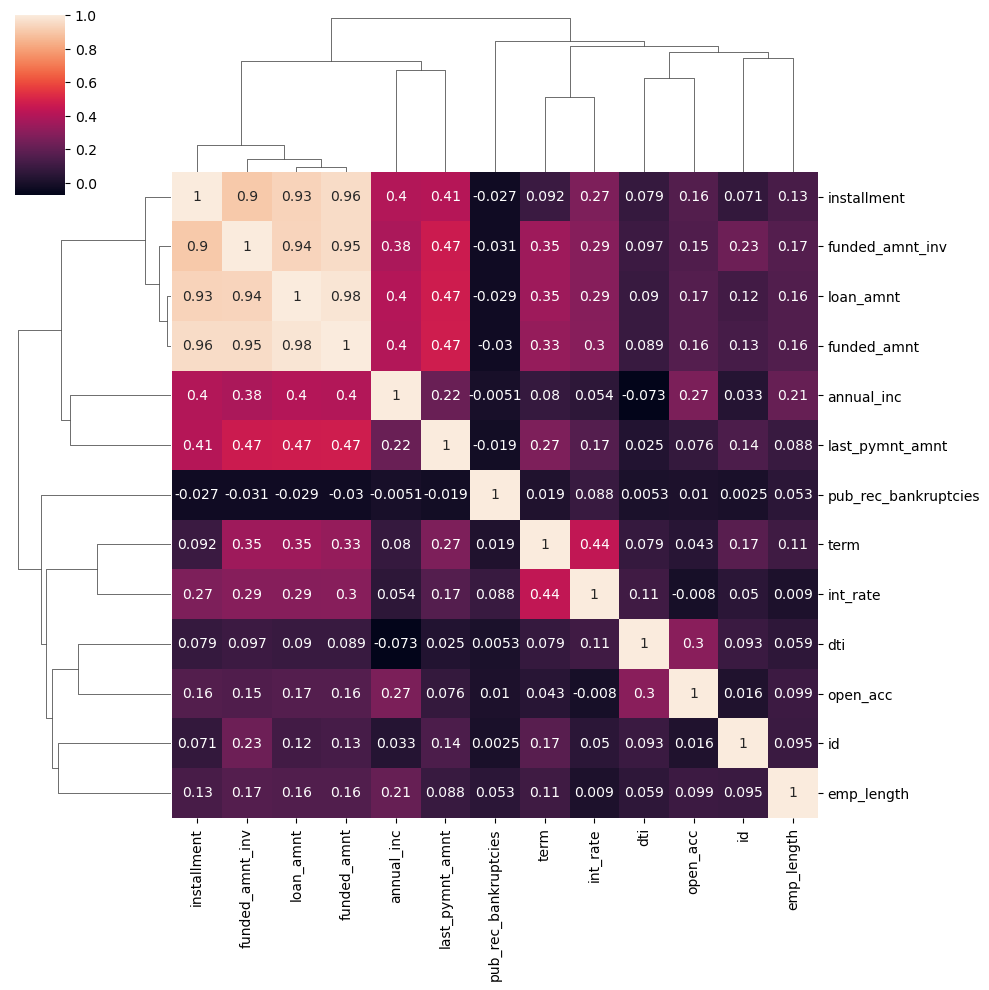

In [133]:
sns.clustermap(new_num_df.corr(),annot=True)

In [134]:
df.loan_status.value_counts()

loan_status
Fully Paid     31226
Charged Off     5416
Name: count, dtype: int64

## Need to find correlation of numerical values with loan_status for insights

In [135]:
new_num_df['loan_status'] = df.loan_status

In [136]:
new_num_df.loan_status = new_num_df.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)

In [138]:
new_num_df.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
id,1.000000,0.115436,0.126312,0.227905,0.171719,0.050195,0.071186,0.094892,0.033070,0.093402,0.016077,0.141309,0.002532,0.044693
loan_amnt,0.115436,1.000000,0.981940,0.936901,0.349595,0.291145,0.931488,0.157613,0.403358,0.090237,0.166060,0.469349,-0.028946,0.066779
funded_amnt,0.126312,0.981940,1.000000,0.954829,0.328801,0.296134,0.957120,0.157282,0.399203,0.089438,0.164063,0.474143,-0.029997,0.064207
funded_amnt_inv,0.227905,0.936901,0.954829,1.000000,0.348418,0.288743,0.902616,0.166206,0.382540,0.097037,0.151554,0.466431,-0.030540,0.044905
term,0.171719,0.349595,0.328801,0.348418,1.000000,0.435550,0.091692,0.105847,0.079962,0.078553,0.043168,0.269766,0.018853,0.176145
int_rate,0.050195,0.291145,0.296134,0.288743,0.435550,1.000000,0.269155,0.009038,0.053952,0.111587,-0.008005,0.165263,0.088120,0.212308
installment,0.071186,0.931488,0.957120,0.902616,0.091692,0.269155,1.000000,0.131165,0.398460,0.079374,0.160841,0.407925,-0.026909,0.033540
emp_length,0.094892,0.157613,0.157282,0.166206,0.105847,0.009038,0.131165,1.000000,0.212148,0.058753,0.099203,0.088006,0.052544,0.009259
annual_inc,0.033070,0.403358,0.399203,0.382540,0.079962,0.053952,0.398460,0.212148,1.000000,-0.072526,0.265014,0.219926,-0.005109,-0.066396
dti,0.093402,0.090237,0.089438,0.097037,0.078553,0.111587,0.079374,0.058753,-0.072526,1.000000,0.298389,0.025007,0.005256,0.041266


In [140]:
new_num_df.drop(columns=['id','last_pymnt_amnt'],inplace=True)

In [141]:
new_num_df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec_bankruptcies,loan_status
loan_amnt,1.000000,0.981940,0.936901,0.349595,0.291145,0.931488,0.157613,0.403358,0.090237,0.166060,-0.028946,0.066779
funded_amnt,0.981940,1.000000,0.954829,0.328801,0.296134,0.957120,0.157282,0.399203,0.089438,0.164063,-0.029997,0.064207
funded_amnt_inv,0.936901,0.954829,1.000000,0.348418,0.288743,0.902616,0.166206,0.382540,0.097037,0.151554,-0.030540,0.044905
term,0.349595,0.328801,0.348418,1.000000,0.435550,0.091692,0.105847,0.079962,0.078553,0.043168,0.018853,0.176145
int_rate,0.291145,0.296134,0.288743,0.435550,1.000000,0.269155,0.009038,0.053952,0.111587,-0.008005,0.088120,0.212308
installment,0.931488,0.957120,0.902616,0.091692,0.269155,1.000000,0.131165,0.398460,0.079374,0.160841,-0.026909,0.033540
emp_length,0.157613,0.157282,0.166206,0.105847,0.009038,0.131165,1.000000,0.212148,0.058753,0.099203,0.052544,0.009259
annual_inc,0.403358,0.399203,0.382540,0.079962,0.053952,0.398460,0.212148,1.000000,-0.072526,0.265014,-0.005109,-0.066396
dti,0.090237,0.089438,0.097037,0.078553,0.111587,0.079374,0.058753,-0.072526,1.000000,0.298389,0.005256,0.041266
open_acc,0.166060,0.164063,0.151554,0.043168,-0.008005,0.160841,0.099203,0.265014,0.298389,1.000000,0.010105,-0.006908


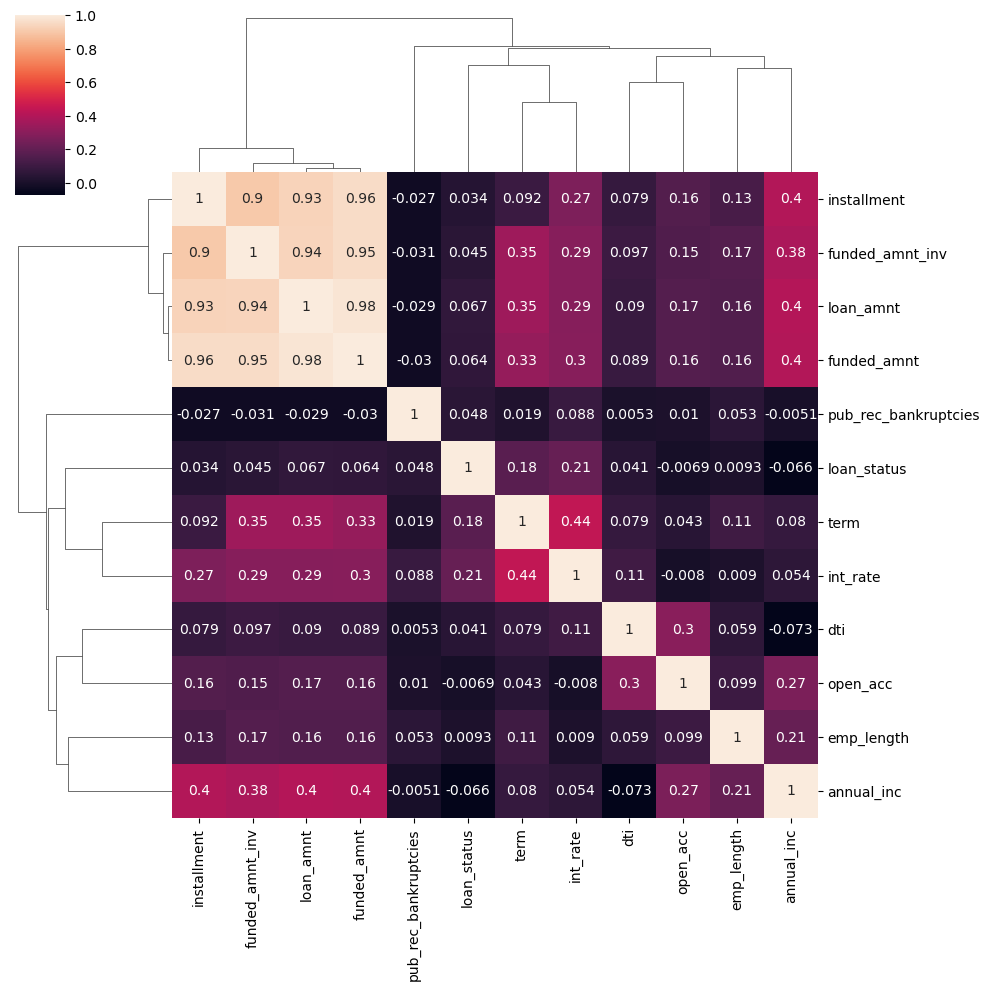

In [142]:
sns.clustermap(new_num_df.corr(),annot=True)

## UniVariate Analysis 
Mean,Median, Max,Min,Std,Variance,Count
Distribution (Histogram, Distplot,CountPlot,boxplot)
## Bivariate Analysis
Relationship between two variables (ScatterPlot,boxplot,barplot,etc)
## MultiVariate Analysis
Relationship between more than one variable HeatMap

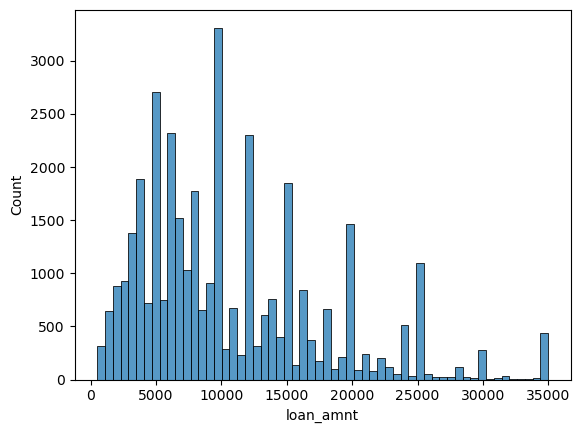

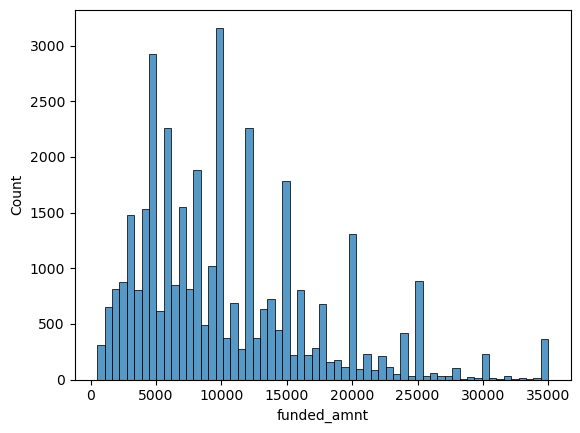

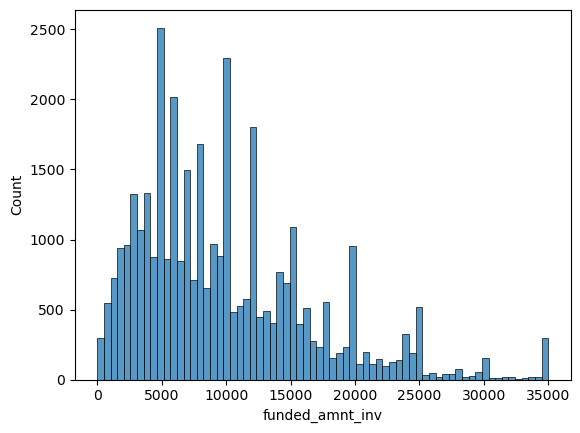

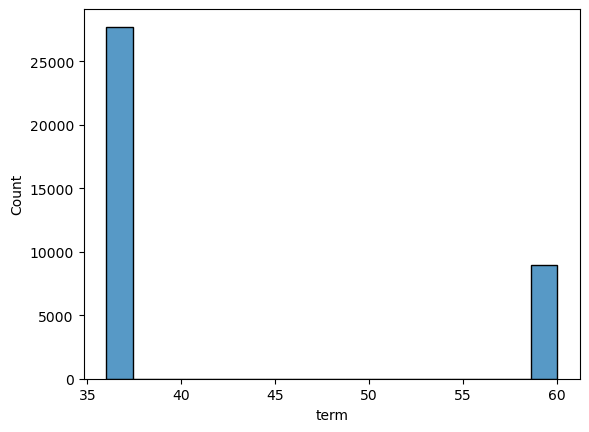

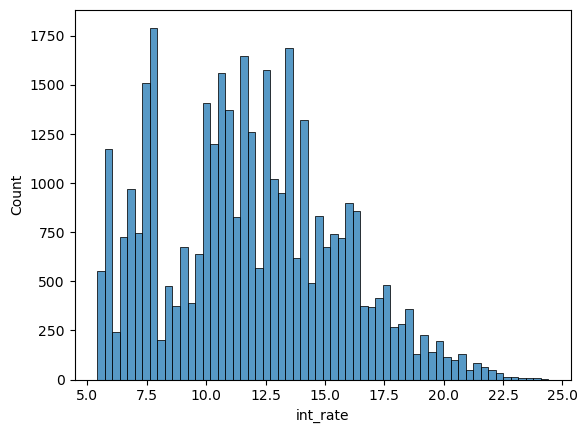

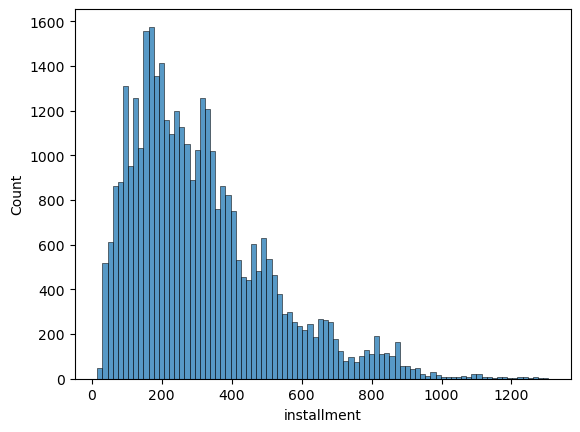

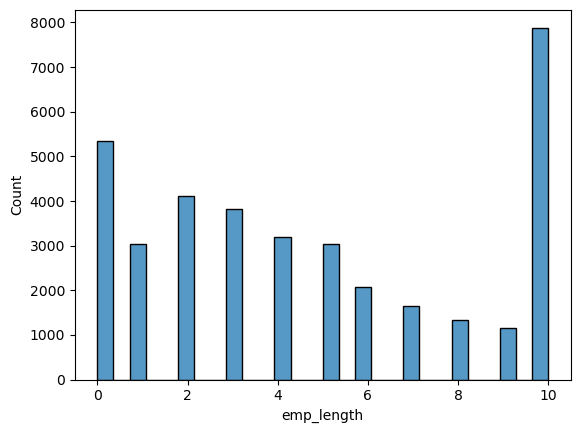

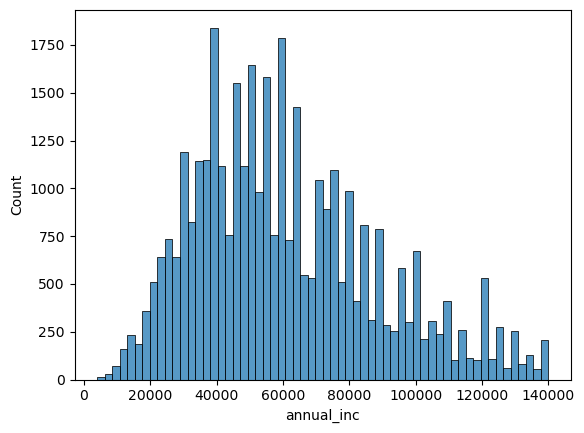

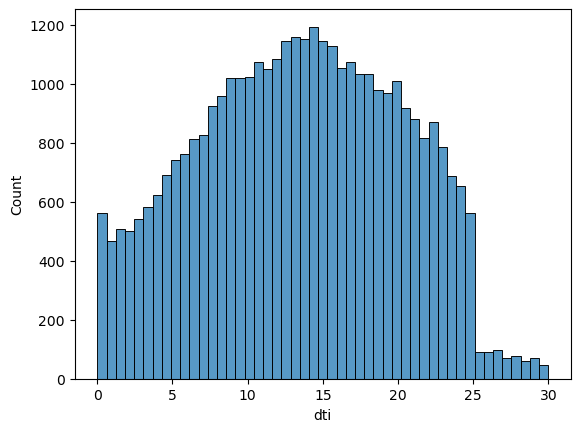

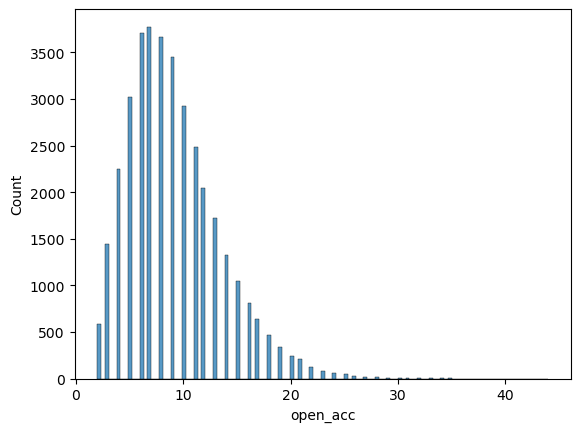

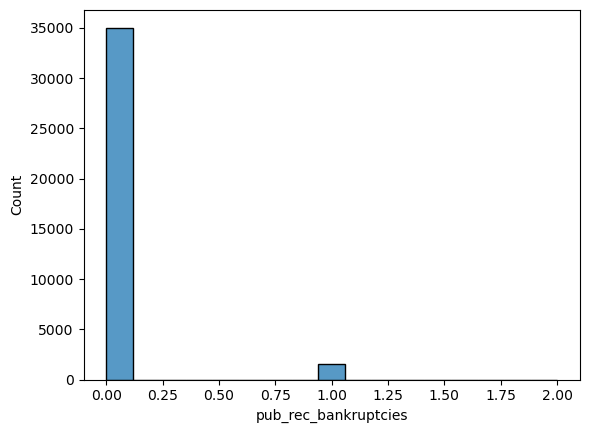

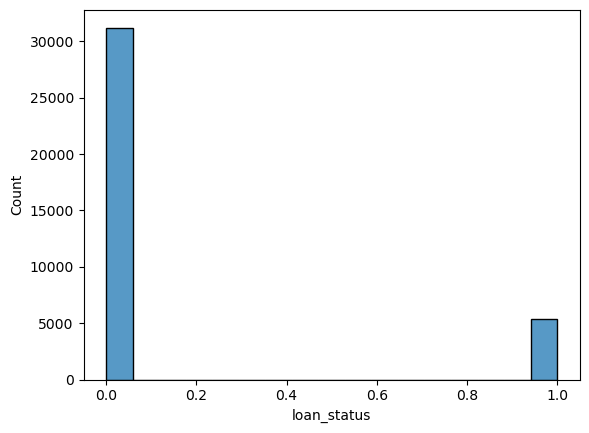

In [144]:
for i in new_num_df.columns:
    sns.histplot(x=new_num_df[i])
    plt.show()

In [145]:
new_num_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec_bankruptcies,loan_status
count,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000
mean,10681.045658,10435.008324,9892.999247,41.847716,11.887884,311.863566,4.764942,60829.831120,13.447256,9.166366,0.043911,0.147809
std,7047.619569,6799.747627,6730.054355,10.303024,3.667161,199.215000,3.588478,27717.831464,6.661561,4.352874,0.205566,0.354915
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,2.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,36.000000,8.940000,163.080000,2.000000,40000.000000,8.350000,6.000000,0.000000,0.000000
50%,9250.000000,9000.000000,8375.000000,36.000000,11.710000,270.410000,4.000000,56000.000000,13.580000,8.000000,0.000000,0.000000
75%,15000.000000,14400.000000,13618.409453,36.000000,14.270000,408.480000,8.000000,77704.050000,18.717500,12.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,140000.000000,29.990000,44.000000,2.000000,1.000000


## Remove OutlIERS 

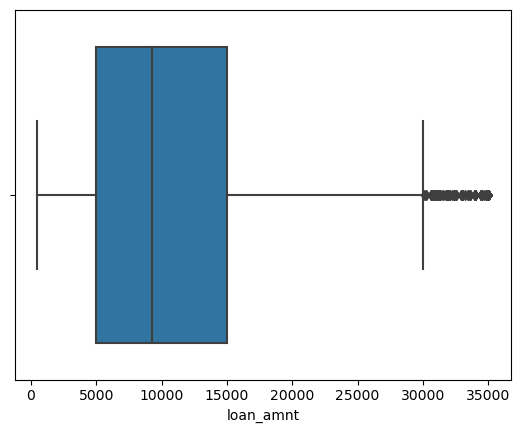

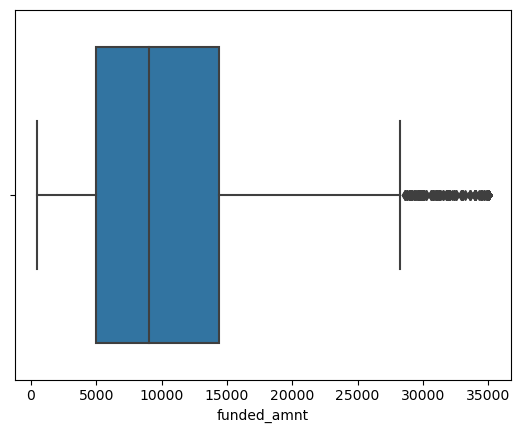

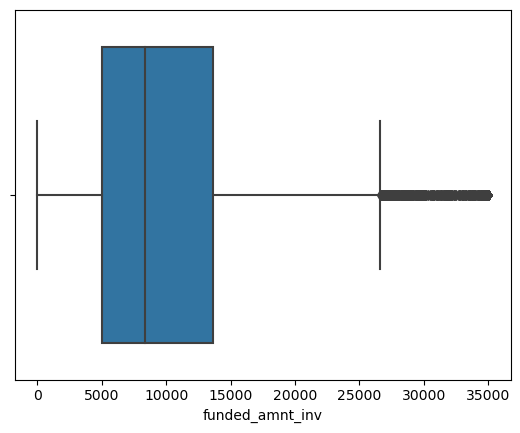

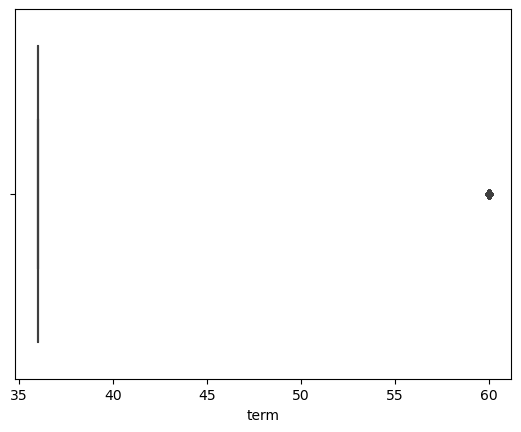

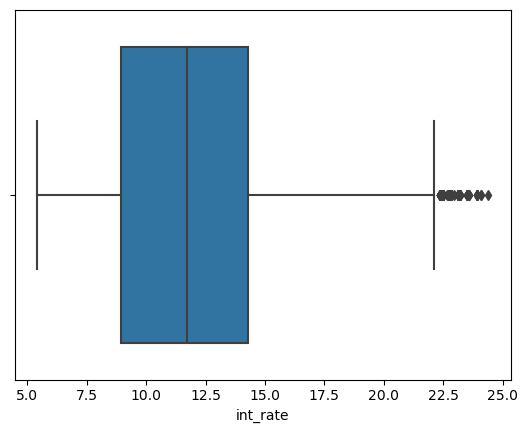

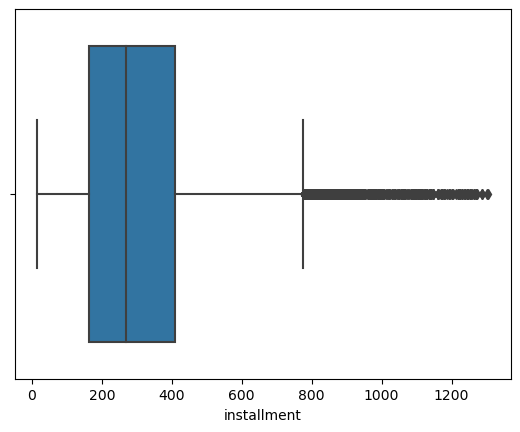

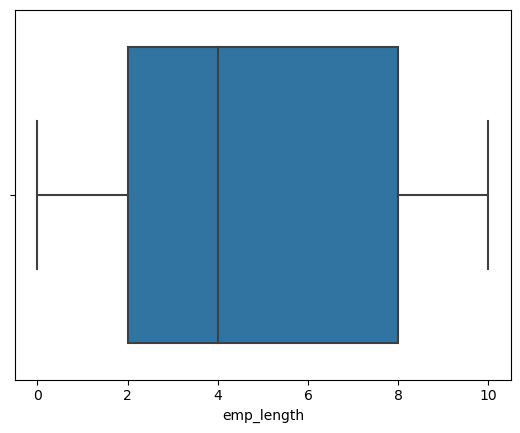

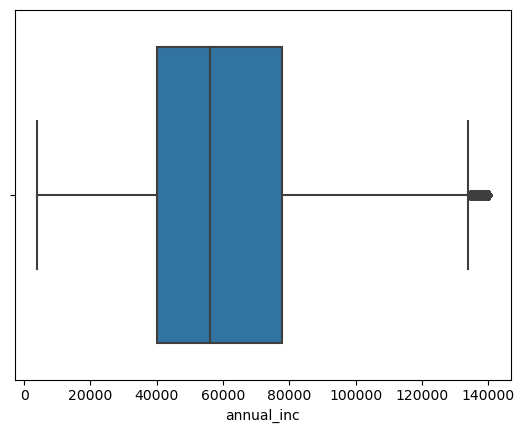

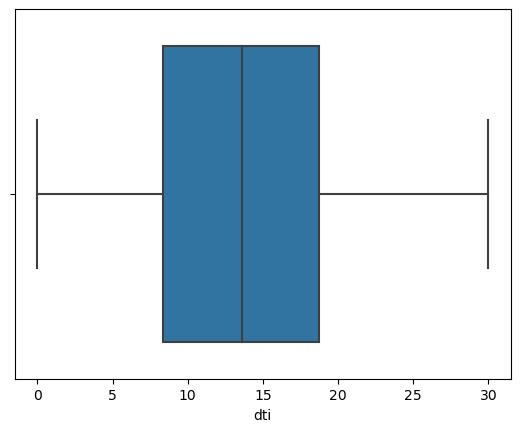

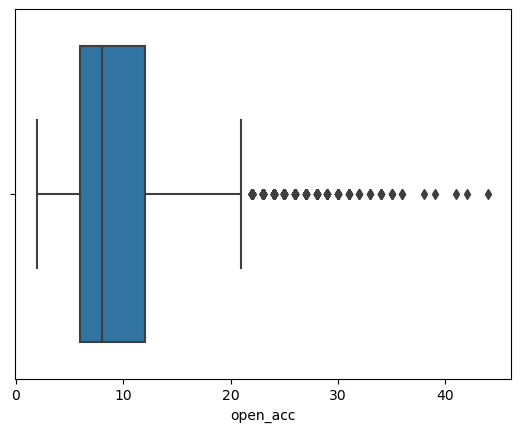

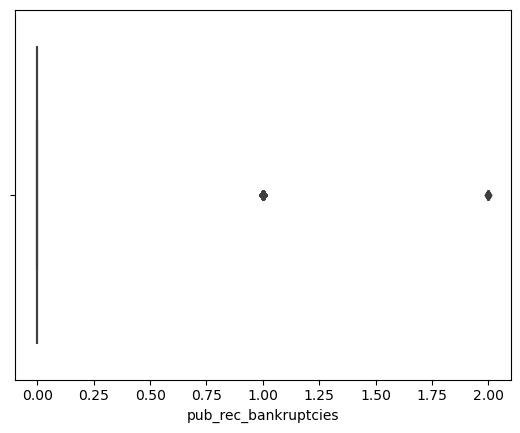

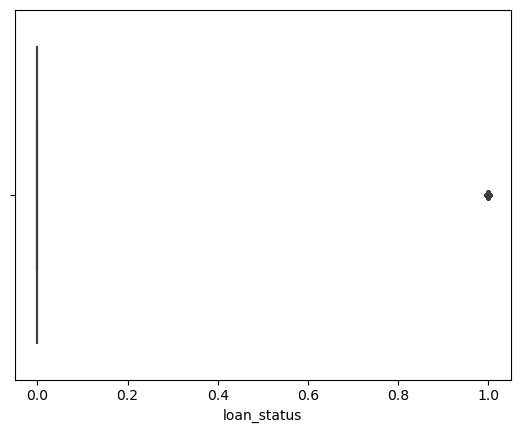

In [147]:
for i in new_num_df.columns:
    sns.boxplot(x=new_num_df[i])
    plt.show()

In [148]:
print(cat_df.columns)

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')


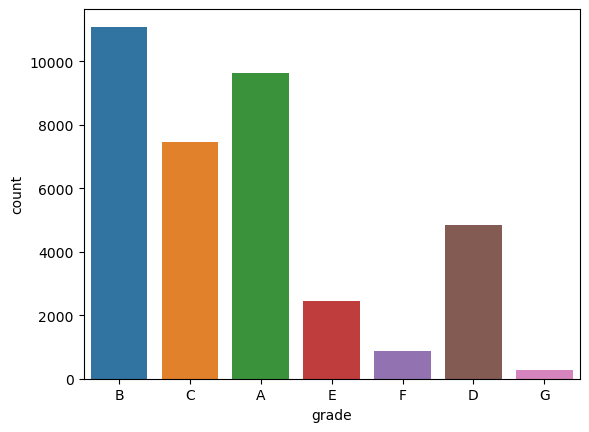

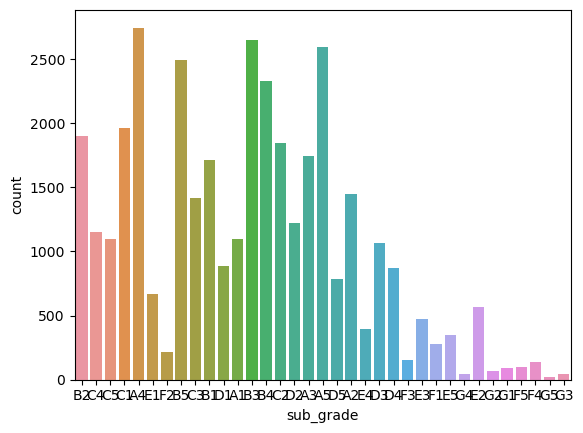

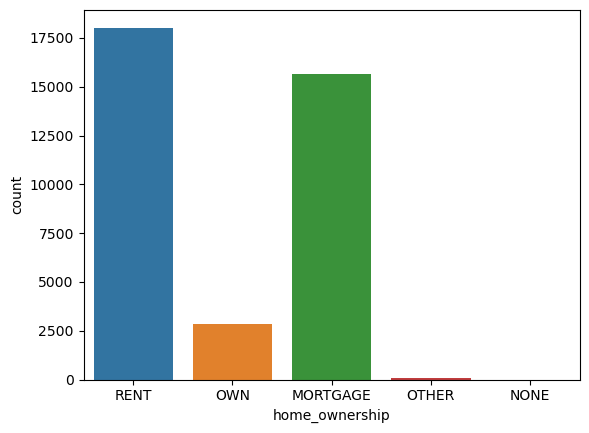

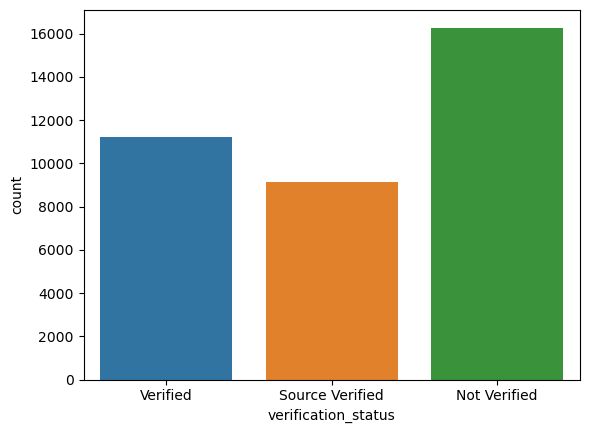

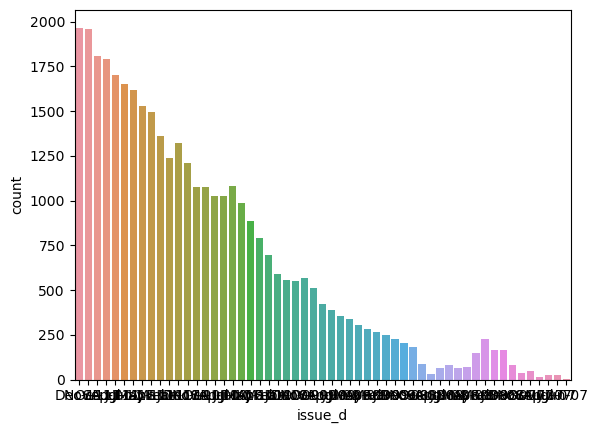

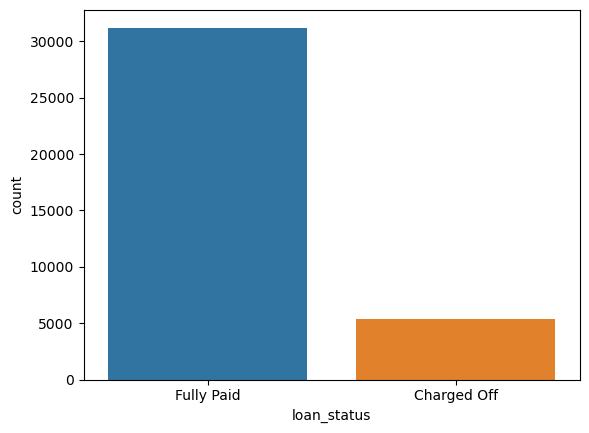

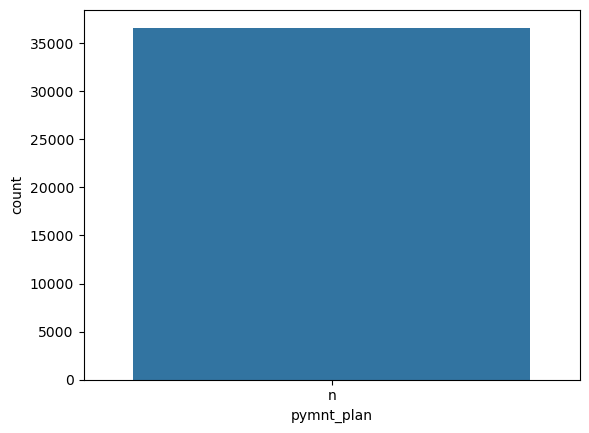

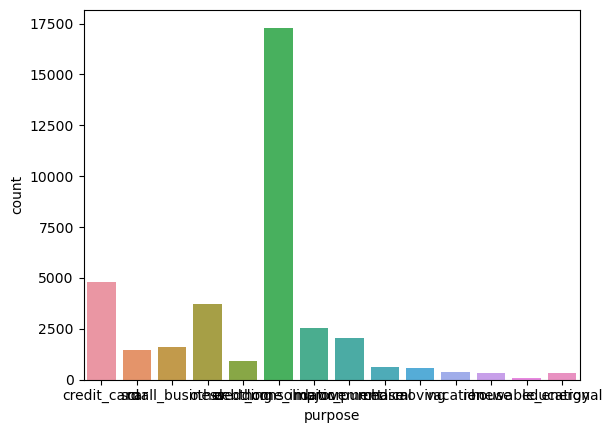

ValueError: 
$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

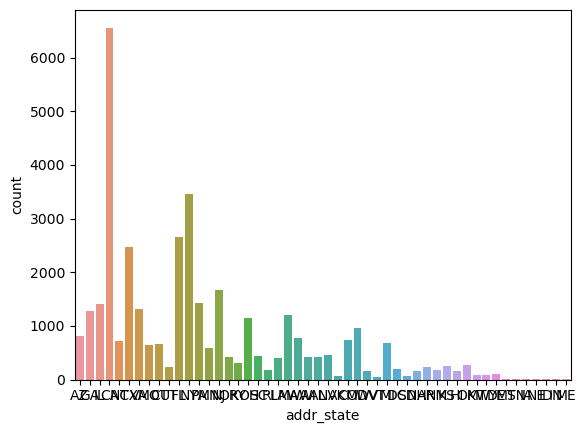

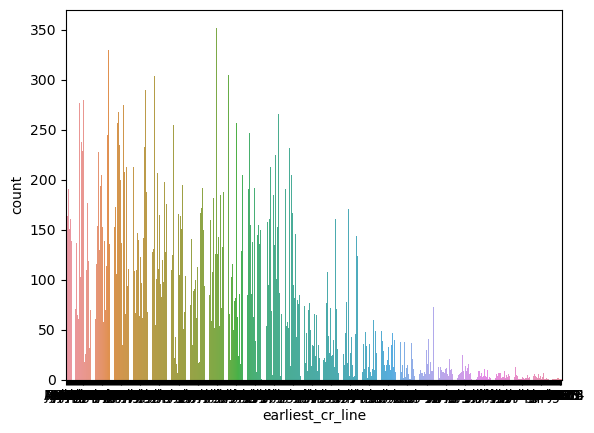

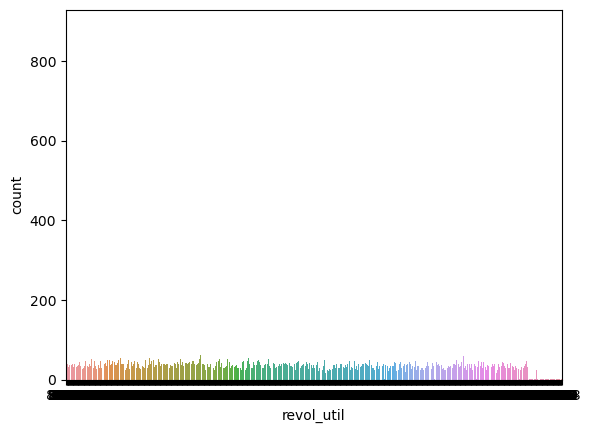

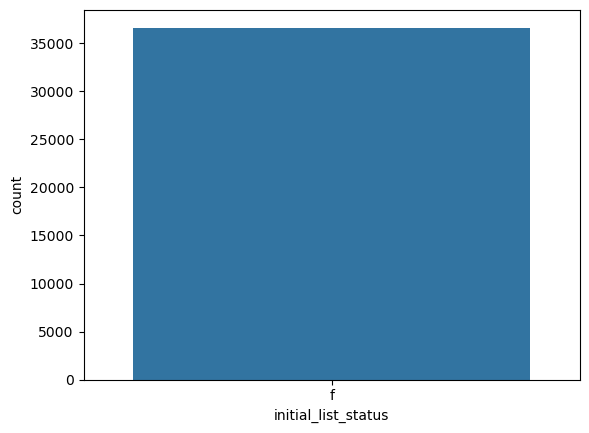

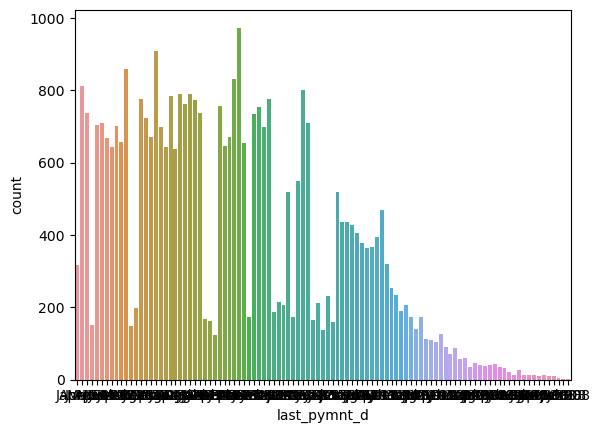

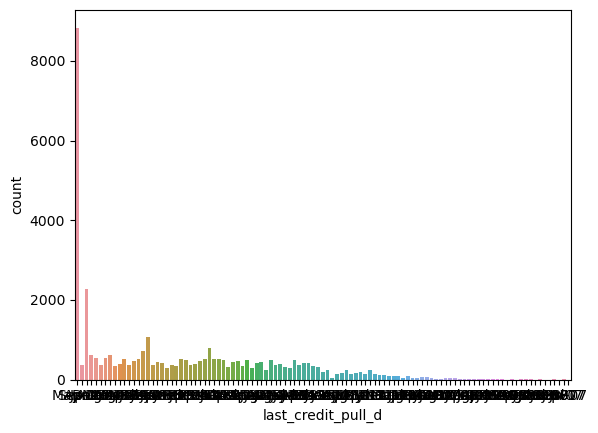

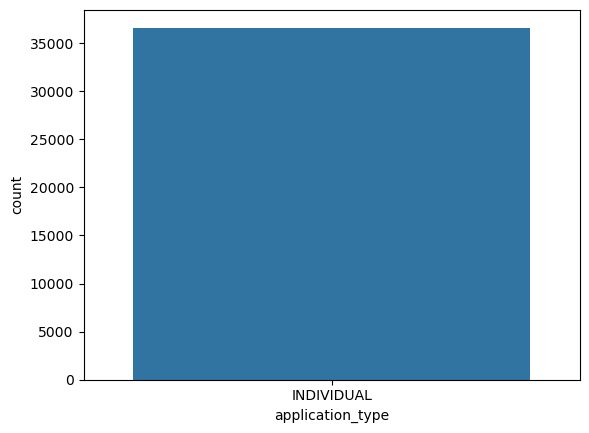

In [149]:
for i in cat_df.columns:
    sns.countplot(x=cat_df[i])
    plt.show()

In [150]:
cat_df.issue_d.value_counts()

issue_d
Dec-11    1967
Nov-11    1961
Oct-11    1810
Sep-11    1790
Aug-11    1700
Jul-11    1650
Jun-11    1617
May-11    1528
Apr-11    1495
Mar-11    1362
Jan-11    1320
Feb-11    1241
Dec-10    1210
Jul-10    1083
Nov-10    1076
Oct-10    1074
Sep-10    1028
Aug-10    1028
Jun-10     987
May-10     886
Apr-10     791
Mar-10     698
Feb-10     592
Nov-09     569
Jan-10     554
Dec-09     553
Oct-09     513
Sep-09     425
Aug-09     391
Jul-09     355
Jun-09     338
May-09     305
Apr-09     280
Mar-09     267
Feb-09     250
Jan-09     229
Mar-08     224
Dec-08     207
Nov-08     180
Feb-08     168
Jan-08     164
Apr-08     146
Oct-08      89
Dec-07      82
Jul-08      81
May-08      69
Aug-08      67
Jun-08      65
Oct-07      46
Nov-07      34
Sep-08      29
Aug-07      28
Jul-07      24
Sep-07      15
Jun-07       1
Name: count, dtype: int64